## P1: Test a Perceptual Phenomenon
    
    
### Background Information

In a Stroop task, participants are presented with a list of words, with each word displayed in a color of ink. The participant’s task is to say out loud the color of the ink in which the word is printed. The task has two conditions: a congruent words condition, and an incongruent words condition. In the congruent words condition, the words being displayed are color words whose names match the colors in which they are printed: for example RED, BLUE. In the incongruent words condition, the words displayed are color words whose names do not match the colors in which they are printed: for example PURPLE, ORANGE. In each case, we measure the time it takes to name the ink colors in equally-sized lists. Each participant will go through and record a time from each condition.

Stroop task applet: [applet](https://www.google.com/url?q=https%3A%2F%2Ffaculty.washington.edu%2Fchudler%2Fjava%2Fready.html&sa=D&sntz=1&usg=AFQjCNGc_1cOHZy4iwBhM93xXvCImuQ1sQ)

#### 1. What is our independent variable? What is our dependent variable?

Independent variable: task condition (a congruent/incongruent words condition)

Dependent variable: reaction time of the task (measured with the time it takes to name the ink colors in equally-sized lists).


####  2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.
    
Let us have:  
population = any person that can perform the Stroop task (can read the list of words and recognize ink colors). The task definition does not put any extra constraints on the population.  
$\mu_c$ = mean reaction time of entire population on the congruent condition test  
$\mu_i$ = mean reaction time of the same entire population on the incogruent condition test  


Test hypothesis:  
**H0**: Task condition does not effect reaction time. Mean reaction time of the entire population is the same on both congruent and incogruent test.  
$\mu_c = \mu_i$ 

**HA**: Task condition effects the reaction time. Congruent test has either significantly lower or significantly higher mean reaction time than the incogruent test.  
$\mu_c < \mu_i$ or $\mu_c > \mu_i$

We have results of two experiments performed on the same sample. This is a scenario for dependent t-test for paired samples.  
We don't try to guess/decide if the congruent test or incogruent test will perform better, thus we'll use 2-tailed t-test.


Alternatively, we could use *intererence* as dependent variable. Interference would be defined as reaction time on incongruent words condition minus reaction time on congruent words condition. In such case:  
**H0**: Task is not interfered by the condition. Mean interference of the entire population = 0.  
**HA**: Task is interfered by the condition. Mean population interference is either < 0 or intererence > 0.  
We should also use 2-tailed t-test for this scenario (dependent samples).


#### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.


In [39]:
import pandas as pd
path = r'./stroopdata.csv'
df = pd.read_csv(path)
df['Interference'] = df['Incongruent'] - df['Congruent']
df
print df['Interference']


0      7.199
1      1.950
2     11.650
3      7.057
4      8.134
5      8.640
6      9.880
7      8.407
8     11.361
9     11.802
10     2.196
11     3.346
12     2.437
13     3.401
14    17.055
15    10.028
16     6.644
17     9.790
18     6.081
19    21.919
20    10.950
21     3.727
22     2.348
23     5.153
Name: Interference, dtype: float64


In [40]:
print 'Congruent test:'
c_mean, c_std = df['Congruent'].mean(), df['Congruent'].std()
print '\tmean = {0}'.format(c_mean)
print '\tstd  = {0}'.format(c_std)
print

print 'Incongruent test:'
i_mean, i_std = df['Incongruent'].mean(), df['Incongruent'].std()
print '\tmean = {0}'.format(i_mean)
print '\tstd  = {0}'.format(i_std)
print

print 'Interference (diff):'
d_mean, d_std = df['Interference'].mean(), df['Interference'].std()
print '\tmean = {0}'.format(d_mean)
print '\tstd  = {0}'.format(d_std)



Congruent test:
	mean = 14.051125
	std  = 3.55935795765

Incongruent test:
	mean = 22.0159166667
	std  = 4.79705712247

Interference (diff):
	mean = 7.96479166667
	std  = 4.86482691036


#### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Populating the interactive namespace from numpy and matplotlib


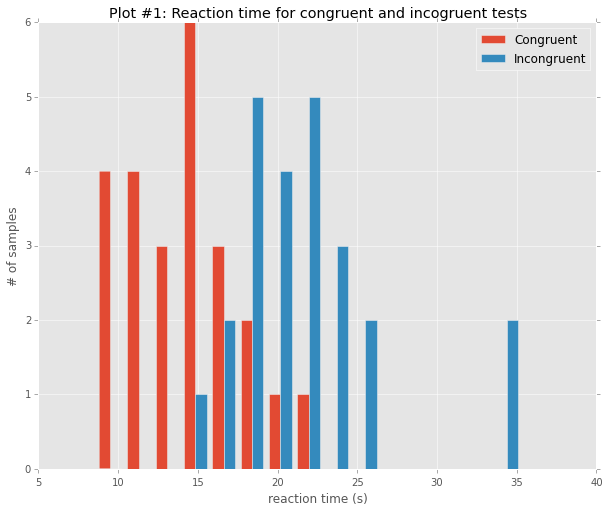

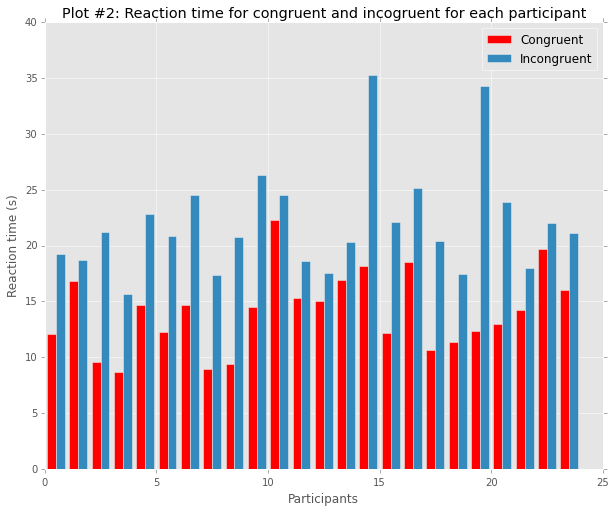

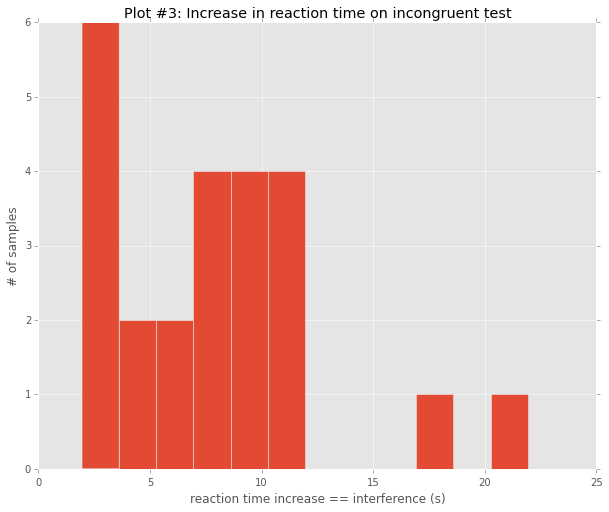

In [41]:
# Causes plots to display within the notebook rather than in a new window
%pylab inline

import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

fig = plt.figure(figsize=(10, 8))
plt.hist([df['Congruent'], df['Incongruent']], bins = 15, label = ['congruent', 'incongruent'])
plt.title('Plot #1: Reaction time for congruent and incogruent tests')
plt.xlabel('reaction time (s)')
plt.ylabel('# of samples')
plt.legend(['Congruent', 'Incongruent'])
plt.show()

s = [x for x in xrange(len(df['Congruent']))]
fig = plt.figure(figsize=(10, 8))
plt.bar([x + 0.1 for x in s], df['Congruent'], width=0.4, color='r')
plt.bar([x + 0.5 for x in s], df['Incongruent'], width=0.4)
plt.title('Plot #2: Reaction time for congruent and incogruent for each participant')
plt.xlabel('Participants')
plt.ylabel('Reaction time (s)')
plt.legend(['Congruent', 'Incongruent'])
plt.show()

fig = plt.figure(figsize=(10, 8))
plt.hist(df['Interference'], bins = 12)
plt.title('Plot #3: Increase in reaction time on incongruent test')
plt.xlabel('reaction time increase == interference (s)')
plt.ylabel('# of samples')
#plt.legend(['Interference'])
plt.show()


Plot \#1:  
- histograms of both congruent and incogruent test starts to look like normal distribution
- incongruent test reaction times are noticeably higher than cogruent test's.

Plot \#2:  
- each participant reaction time was bigger on incogruent test

Plot \#3:
- due to small number of samples there is no obvious answer what is the type of interference distribution.  
  The most interesting candidates are: normal distribution, right-skewed and bimodal.


####5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?


confidence level: 5%   
n (# of samples): 24  
df (degrees of freedom): 23  
critical statistic value: +/-2.069  


t = $\frac{\mu_i - \mu_c}{s / \sqrt{n}}$ = $\frac{22.0159 - 14.0511}{4.8648 / \sqrt{24}}$ = 8.0207

The t-statistic rejects the null hypothesis.  
With 95% confidence we can say that incongruent test has significantly different reaction time than congruent test.

This is an expected result for me. I tried to do the test and there was noticeable difference in the way how the brain performs the task: congruent test seemed much more automatic (and as result, faster), than incongruent test.


In [42]:
from scipy import stats
rvs = stats.ttest_rel(df['Incongruent'], df['Congruent'])
print rvs

(8.020706944109957, 4.1030005857111781e-08)


#### 6. Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!



The congruent task was more about reading the colors than recognizing them.  
The incogruent task was about recognizing the colors.  
Both tasks have different levels of automations: people spend significantly more time reading than consciously naming colors which they see.
    
Probably similar results can be obrained if we replace any of the tasks with a task with similar automation level:
- more-automated task: using bigger/smaller font
- less-automated task: determine if number is odd/even

Then:  
**congruent task**: given an array of numbers (e.g. 30?), count how many of them are even. Even numbrers would be written with slighlty bigger font than odd ones.  
**incogruent task**: count how many number are even. Some numbers are written with bigger font than others, but there is no correlation between parity and font size.


#### Bibliography:
    
- [Stroop effect on Wikipedia](https://en.wikipedia.org/wiki/Stroop_effect)
- [1 vs 2 tailed test](http://www.chem.utoronto.ca/coursenotes/analsci/StatsTutorial/12tailed.html)
- [z-test vs t-test](http://www2.le.ac.uk/departments/biology/existing/introduction-to-statistics/comparisons/z-tests-and-t-tests)
- [dependent t-test on Wikipedia](https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test_for_paired_samples)
- [dependent sample t-test example](http://stattrek.com/hypothesis-test/paired-means.aspx?Tutorial=AP)
- [chemosensory cross-modal stroop effects](http://chemse.oxfordjournals.org/content/32/4/337.full)